### Fatehinia
#### ex: تولید نقاط تصادفی در گوی واحد
#### link: ``https://vu.um.ac.ir/mod/assign/view.php?id=441612``

In [77]:
import numpy as np
from matplotlib import pyplot as plt


In [78]:
def sample_by_rejection(D=2, N=10_000, batch_size=1000):
    A = []

    def count(A):
        c = 0
        for a in A:
            c += a.shape[0]
        return c

    total_generated = 0
    while count(A) < N:
        total_generated += batch_size
        sample = (np.random.rand(batch_size*D)*2-1).reshape(-1, D)
        norms = np.linalg.norm(sample, ord=2, axis=1)
        true_sample = sample[norms <= 1]
        A.append(true_sample)

    true_sample = np.concatenate(A)[:N]
    ratio = count(A)/total_generated
    return true_sample, total_generated, ratio


N: 13000


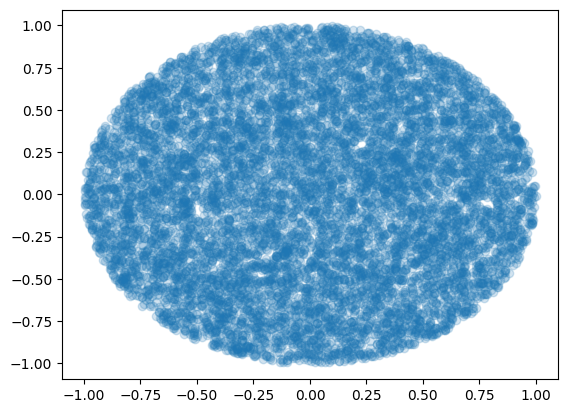

In [79]:
true_sample, N, _ = sample_by_rejection()
print(f"N: {N}")
plt.scatter(true_sample[:, 0], true_sample[:, 1],alpha=0.2)
plt.show()

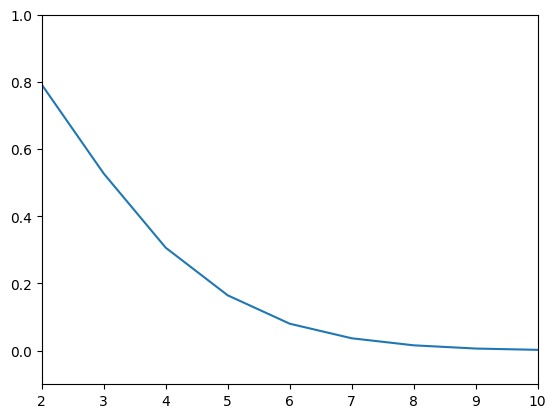

In [80]:
l, r = 2, 11
ratios = [sample_by_rejection(D=i)[2] for i in range(l,r)]
plt.plot(range(l,r), ratios)
plt.xlim(l, r-1)
plt.ylim(-0.1, 1)
plt.show()